<a href="https://colab.research.google.com/github/gbardaklis/Mini-Project-1/blob/main/MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings

# Task 1: Dataset Preparation & Analysis

In [3]:
with open("/content/goemotions.json") as f:
    data = json.load(f)

In [5]:
# importing the json file into a dataframe 
df = pd.DataFrame(data, columns = ['Post', 'Emotion', 'Sentiment'])
df

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
...,...,...,...
171815,"Well, I'm glad you're out of all that now. How...",joy,positive
171816,Everyone likes [NAME].,love,positive
171817,Well when you’ve imported about a gazillion of...,caring,positive
171818,That looks amazing,admiration,positive


In [6]:
postsDict = df['Post'].values.tolist()

In [7]:
# Returns the count of all 28 emotions, and stores it in countEmotions
countEmotions = df['Emotion'].value_counts()
# Turning the counts into a dictionary of pairs 
emotionsDict = countEmotions.to_dict()
# emotionsDict

In [8]:
# Returns the count of all 4 sentiments, and stores it in countSentiments
countSentiments = df['Sentiment'].value_counts()
# Turning the sentiment count into a dictionary of pairs 
sentimentsDict = countSentiments.to_dict()
# sentimentsDict

In [ ]:
# # Stores emotions into a list
# emotion = df['Emotion'].tolist()
# # Removes emotions duplicate from the list
# emotion = list(dict.fromkeys(emotion))

In [ ]:
# # Stores sentiments into a list
# sentiment = df['Sentiment'].tolist()
# # Removes sentiments duplicate from the list
# sentiment = list(dict.fromkeys(sentiment))

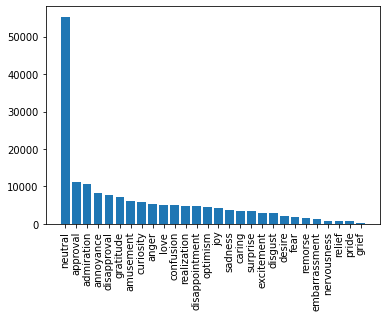

<Figure size 432x288 with 0 Axes>

In [9]:
# Printing histogram for emotions
plt.bar(emotionsDict.keys(), emotionsDict.values())
# 90 degree roration on x-axis labels
plt.xticks(rotation = 90)
plt.show()
plt.savefig('emotion-plot.pdf')

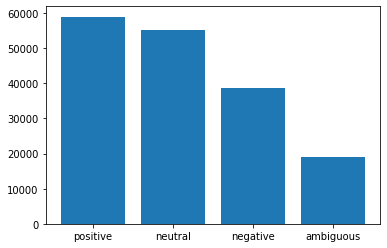

<Figure size 432x288 with 0 Axes>

In [10]:
# Printing sentiments in histogram
plt.bar(sentimentsDict.keys(), sentimentsDict.values())
plt.show()
plt.savefig('sentiment-plot.png')

# Task 2: Words as Features

In [14]:
# 2.1 --display the number of tokens (the size of the vocabulary) in the dataset

vectorizer = CountVectorizer()
post = vectorizer.fit_transform(postsDict)
print(f'The size of the vocabulary is {vectorizer.get_feature_names_out().shape[0]} words.')

The size of the vocabulary is 30449 words.


In [12]:
# 2.2 --split the dataset into 80% for training and 20% for testing
post_train, post_test,emotion_train, emotion_test, sentiment_train, sentiment_test = train_test_split(post,df['Emotion'], df['Sentiment'], test_size=0.2)

In [ ]:
# 2.3 --train and test for both the emotion and sentiment classification using word frequency as features

In [13]:
# 2.3.1 --Base-MNB with the default parameters
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
%time mnb.fit(post_train, emotion_train)
%time mnb.fit(post_train, sentiment_train)

CPU times: user 1.12 s, sys: 21.1 ms, total: 1.15 s
Wall time: 1.15 s
CPU times: user 882 ms, sys: 6.83 ms, total: 889 ms
Wall time: 889 ms


MultinomialNB()

In [ ]:
# 2.3.2 --Base-DT with the default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()
%time dt.fit(post_train, emotion_train)
%time dt.fit(post_train, sentiment_train)

CPU times: user 2min 9s, sys: 170 ms, total: 2min 10s
Wall time: 2min 9s
CPU times: user 1min 52s, sys: 106 ms, total: 1min 53s
Wall time: 1min 52s


DecisionTreeClassifier()

In [ ]:
#2.3.3 --Base-MLP with the default parameters
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(early_stopping=True, max_iter=15)
%time mlp.fit(post_train, emotion_train)
%time mlp.fit(post_train, sentiment_train)

CPU times: user 11min 50s, sys: 9min 4s, total: 20min 54s
Wall time: 10min 53s
CPU times: user 12min 17s, sys: 9min 27s, total: 21min 45s
Wall time: 11min 19s


MLPClassifier(early_stopping=True, max_iter=15)

In [ ]:
#2.3.4 --Top-MNB using GridSearchCV
warnings.simplefilter('ignore', UserWarning)
from sklearn.model_selection import GridSearchCV
param = {'alpha' : [0.5, 0, 1.0, 1.5]}
mnb_gscv = GridSearchCV(MultinomialNB(), param)
%time mnb_gscv.fit(post_train, emotion_train)
%time mnb_gscv.fit(post_train, sentiment_train)

CPU times: user 26.5 s, sys: 139 ms, total: 26.6 s
Wall time: 26.7 s
CPU times: user 19.6 s, sys: 103 ms, total: 19.7 s
Wall time: 19.7 s


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 0, 1.0, 1.5]})

In [ ]:
#2.3.5 --Top-DT using GridSearchCV
from sklearn.model_selection import GridSearchCV
param = {'criterion' : ['gini', 'entropy'], 'max_depth' : [18,36], 'min_samples_split' : [3,6,9]}
dt_gscv = GridSearchCV(DecisionTreeClassifier(), param)
%time dt_gscv.fit(post_train, emotion_train)
%time dt_gscv.fit(post_train, sentiment_train)



CPU times: user 8min 40s, sys: 819 ms, total: 8min 41s
Wall time: 8min 40s
CPU times: user 7min 12s, sys: 681 ms, total: 7min 12s
Wall time: 7min 12s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 36],
                         'min_samples_split': [3, 6, 9]})

In [ ]:
#2.3.6 --Top-MLP using GridSearchCV
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.model_selection import GridSearchCV
param = {'activation' : ['logistic', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes' : [(10,30,10), (50, 30)], 'solver' : ['adam', 'sgd']}
mlp_gscv = GridSearchCV(MLPClassifier(early_stopping=True, max_iter=1, verbose=True), param)
%time mlp_gscv.fit(post_train, emotion_train)
%time mlp_gscv.fit(post_train, sentiment_train)

In [ ]:
#2.4 --save info required  in a file called "performance"
from sklearn import metrics
import numpy as np

In [ ]:
#2.4: Base-MNB
#emotion
with open('performance.txt', 'a') as performance:
  print('Base-MNB: Emotion Classification', mnb, file=performance)
  emotion_pred = mnb.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Base-MNB: Sentiment Classification', mnb, file=performance)
  sentiment_pred = mnb.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)


In [ ]:
#2.4: Base-DT
#emotion
with open('performance.txt', 'a') as performance:
  print('Base-DT: Emotion Classification', dt, file=performance)
  emotion_pred = dt.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Base-DT: Sentiment Classification', dt, file=performance)
  sentiment_pred = dt.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)

In [ ]:
#2.4: Base-MLP
#emotion
with open('performance.txt', 'a') as performance:
  print('Base-MLP: Emotion Classification', mlp, file=performance)
  emotion_pred = mlp.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Base-MLP: Sentiment Classification', mlp, file=performance)
  sentiment_pred = mlp.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)

In [ ]:
#2.4: Top-MNB
#emotion
with open('performance.txt', 'a') as performance:
  print('Top-MNB: Emotion Classification', mnb_gscv, file=performance)
  emotion_pred = mnb_gscv.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Top-MNB: Sentiment Classification', mnb_gscv, file=performance)
  sentiment_pred = mnb_gscv.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)

In [ ]:
#2.4: Top-DT
#emotion
with open('performance.txt', 'a') as performance:
  print('Top-DT: Emotion Classification', dt_gscv, file=performance)
  emotion_pred = dt_gscv.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Top-DT: Sentiment Classification', dt_gscv, file=performance)
  sentiment_pred = dt_gscv.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)

In [ ]:
#2.4: Top-MLP
#emotion
with open('performance.txt', 'a') as performance:
  print('Top-MLP: Emotion Classification', mlp_gscv, file=performance)
  emotion_pred = mlp_gscv.fit(post_train, emotion_train).predict(post_test)
  print('Emotion Prediction: \n',emotion_pred, file=performance)
  ecm = metrics.confusion_matrix(emotion_test, emotion_pred)
  print('Emotion Confusion Matrix: \n',ecm, file=performance)
  ecr = metrics.classification_report(emotion_test,emotion_pred,labels=np.unique(emotion_test), zero_division=0)
  print('Emotion Classification Report: \n',ecr, file=performance)

#sentiment
  print('Top-MLP: Sentiment Classification', mlp_gscv, file=performance)
  sentiment_pred = mlp_gscv.fit(post_train, sentiment_train).predict(post_test)
  print('Sentiment Prediction: \n',sentiment_pred, file=performance)
  scm = metrics.confusion_matrix(sentiment_test, sentiment_pred)
  print('Sentiment Confusion Matrix: \n',scm, file=performance)
  scr = metrics.classification_report(sentiment_test,sentiment_pred,labels=np.unique(sentiment_test), zero_division=0)
  print('Sentiment Classification Report: \n',scr, file=performance)

In [16]:
#2.5: TfidfTransformer-train and test for both the emotion and sentiment classification
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
post_tfidf = transformer.fit_transform(post)
#split the dataset into 80% for training and 20% for testing
post_train, post_test,emotion_train, emotion_test, sentiment_train, sentiment_test = train_test_split(post_tfidf,df['Emotion'], df['Sentiment'], test_size=0.2)

In [17]:
#Base-MNB
from sklearn.naive_bayes import MultinomialNB
with open('experiment.txt', 'a') as exp:
  mnb = MultinomialNB()
  emnb = %time mnb.fit(post_train, emotion_train)
  smnb = %time mnb.fit(post_train, sentiment_train)
  print('Emotion Base-MNB', emnb, file=exp)
  print('Sentiment Base-MNB', smnb, file=exp)

CPU times: user 1.95 s, sys: 9.85 ms, total: 1.96 s
Wall time: 1.97 s
CPU times: user 1.73 s, sys: 7.46 ms, total: 1.74 s
Wall time: 1.75 s


In [18]:
#Base-DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
with open('experiment.txt', 'a') as exp:
  dt = DecisionTreeClassifier()
  edt = %time dt.fit(post_train, emotion_train)
  sdt = %time dt.fit(post_train, sentiment_train)
  print('Emotion Base-DT', edt, file=exp)
  print('Sentiment Base-DT', sdt, file=exp)

CPU times: user 2min 34s, sys: 139 ms, total: 2min 34s
Wall time: 2min 35s
CPU times: user 2min 14s, sys: 166 ms, total: 2min 14s
Wall time: 2min 14s


In [19]:
#Base-MLP
from sklearn.neural_network import MLPClassifier
with open('experiment.txt', 'a') as exp:
  mlp = MLPClassifier(early_stopping=True, max_iter=15)
  emlp = %time mlp.fit(post_train, emotion_train)
  smlp = %time mlp.fit(post_train, sentiment_train)
  print('Emotion Base-MLP', emlp, file=exp)
  print('Sentiment Base-MLP', smlp, file=exp)

CPU times: user 14min 15s, sys: 13min 1s, total: 27min 17s
Wall time: 14min 20s
CPU times: user 12min 39s, sys: 11min 35s, total: 24min 14s
Wall time: 12min 42s


In [20]:
#Top-MNB
warnings.simplefilter('ignore', UserWarning)
from sklearn.model_selection import GridSearchCV
with open('experiment.txt', 'a') as exp:
  param = {'alpha' : [0.5, 0, 1.0, 1.5]}
  mnb_gscv = GridSearchCV(MultinomialNB(), param)
  emnb_gscv = %time mnb_gscv.fit(post_train, emotion_train)
  smnb_gscv = %time mnb_gscv.fit(post_train, sentiment_train)
  print('Emotion Top-MNB', emnb_gscv, file=exp)
  print('Sentiment Top-MNB', smnb_gscv, file=exp)

CPU times: user 31.7 s, sys: 227 ms, total: 31.9 s
Wall time: 31.9 s
CPU times: user 24.7 s, sys: 185 ms, total: 24.9 s
Wall time: 24.8 s


In [21]:
#Top-DT
from sklearn.model_selection import GridSearchCV
with open('experiment.txt', 'a') as exp:
  param = {'criterion' : ['gini', 'entropy'], 'max_depth' : [18,36], 'min_samples_split' : [3,6,9]}
  dt_gscv = GridSearchCV(DecisionTreeClassifier(), param)
  edt_gscv = %time dt_gscv.fit(post_train, emotion_train)
  sdt_gscv = %time dt_gscv.fit(post_train, sentiment_train)
  print('Emotion Top-DT', edt_gscv, file=exp)
  print('Sentiment Top-DT', sdt_gscv, file=exp)

CPU times: user 22min 19s, sys: 1.87 s, total: 22min 21s
Wall time: 22min 17s
CPU times: user 13min 10s, sys: 1.18 s, total: 13min 11s
Wall time: 13min 8s


In [22]:
#Top-MLP
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.model_selection import GridSearchCV
with open('experiment.txt', 'a') as exp:
  param = {'activation' : ['logistic', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes' : [(10,30,10), (50, 30)], 'solver' : ['adam', 'sgd']}
  mlp_gscv = GridSearchCV(MLPClassifier(early_stopping=True, max_iter=1, verbose=True), param)
  emlp_gscv = %time mlp_gscv.fit(post_train, emotion_train)
  smlp_gscv = %time mlp_gscv.fit(post_train, sentiment_train)
  print('Emotion Top-MLP', emlp_gscv, file=exp)
  print('Sentiment Top-MLP', smlp_gscv, file=exp)

Iteration 1, loss = 2.81170166
Validation score: 0.324270
Iteration 1, loss = 2.85599873
Validation score: 0.319905
Iteration 1, loss = 2.83447757
Validation score: 0.322179
Iteration 1, loss = 2.80497344
Validation score: 0.322452
Iteration 1, loss = 2.83855694
Validation score: 0.317086
Iteration 1, loss = 2.97651286
Validation score: 0.322997
Iteration 1, loss = 2.92808480
Validation score: 0.320451
Iteration 1, loss = 2.91834673
Validation score: 0.322361
Iteration 1, loss = 2.96016932
Validation score: 0.316541
Iteration 1, loss = 2.92245379
Validation score: 0.317905
Iteration 1, loss = 2.73917603
Validation score: 0.326635
Iteration 1, loss = 2.76416830
Validation score: 0.317268
Iteration 1, loss = 2.74765897
Validation score: 0.324452
Iteration 1, loss = 2.74910342
Validation score: 0.324179
Iteration 1, loss = 2.77162876
Validation score: 0.319451
Iteration 1, loss = 2.88494353
Validation score: 0.315086
Iteration 1, loss = 2.83524657
Validation score: 0.318269
Iteration 1, l